# DIP第五章数学形态学作业：计算粒子大小分布

### 读入图片，将图片转换为灰度图，使用高斯降噪对图片平滑去噪，设阈值二值化

(274, 279)


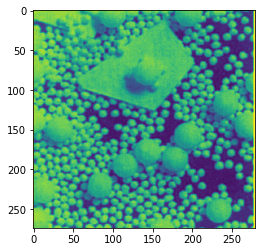

In [8]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("Chapter5_1.bmp")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # 将图像转换成灰度图
plt.imshow(gray)

print(gray.shape)  # 图像形状为(274, 279)

img2 = cv2.GaussianBlur(gray, (5, 5), 0.05)  # 平滑去燥
_, imgBinary = cv2.threshold(img2, 80, 255, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)  # 设阈值二值化

In [5]:
import cv2
import matplotlib.pyplot as plt

sizes = []
values = []

#  利用等差数列函数，不断增加kernel的大小，计算开运算对图像的影响
for size in range(3, 100, 2):
    # 定义结构元的类型和大小
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (size - 2, size - 2))
    # 利用opencv中的morphologyEx()函数实现开运算
    imgOpen_1 = cv2.morphologyEx(imgBinary, cv2.MORPH_OPEN, kernel=kernel)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))
    imgOpen_2 = cv2.morphologyEx(imgBinary, cv2.MORPH_OPEN, kernel=kernel)

    diffImg = imgOpen_2 - imgOpen_1
    # 统计一个通道腐蚀导致减少的点的数量
    diffValue = cv2.sumElems(diffImg)[0] / 255
    # 结构元的size 
    sizes.append(size)
    # 区域的面积除以结构元的大小，得出不同粒子大小的比例
    values.append(diffValue / size)  
MAX = max(values)
values = [i if i > 0.03 * MAX else 0 for i in values]  # 去掉较小的数据
values = [i / sum(values) for i in values]  # 计算各个尺寸占的比例

### 绘制粒子测度柱状图

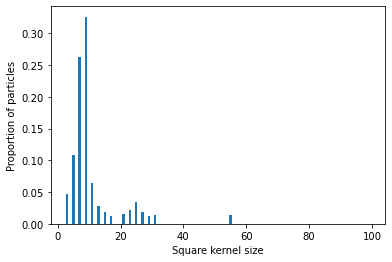

In [6]:
import matplotlib.pyplot as plt

plt.bar(sizes, values) 
plt.xlabel("Square kernel size")
plt.ylabel("Proportion of particles")
plt.show()